In [311]:
import numpy as np
import pandas as pd
import sys

#from pandas import Series, Dataframe
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
%matplotlib inline  


In [312]:
#import the train and test file.
dataset = pd.read_csv('Hitters.csv')
dataset = dataset.drop(['Name', 'League', 'Division', 'NewLeague'], axis = 1)
dataset = dataset[np.isfinite(dataset['Salary'])] #excludes NA salary

column_index = len(dataset.columns)-1  
X = dataset.iloc[:, 0:column_index] #All numeric data
Y = dataset.iloc[:, column_index] #Salary




**QUESTION 1.1)**

Text(0.5,1,'LASSO: Coefficient Trajectories')

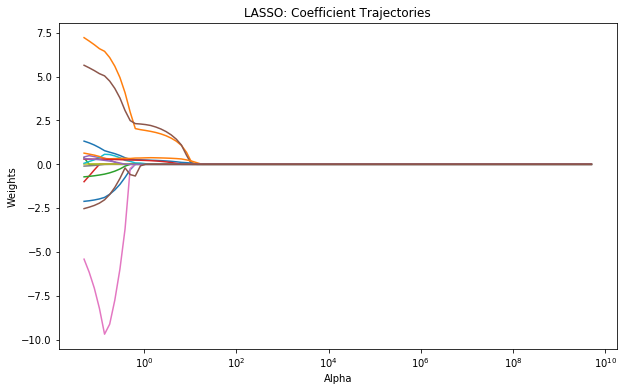

In [313]:
alphas = 10 ** np.linspace(10, -1, 100) * 0.5
alpha_three_pred = 0

lasso_coeff = []
for the_alpha in alphas:
    lasso_reg = Lasso(alpha = the_alpha, max_iter = 10000, normalize = True)
    lasso_reg.fit(X,Y)
    lasso_coeff.append(lasso_reg.coef_)

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, lasso_coeff)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.axis('tight')
plt.title('LASSO: Coefficient Trajectories')



alpha_three_pred: 10.772173450159434
AtBat      0.000000
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
CRuns      0.065968
Hits       0.103972
CRBI       0.182608
dtype: float64


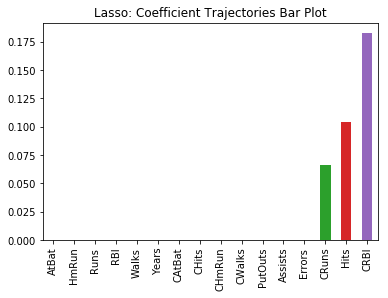

In [326]:
#Now, we will find an alpha such that we have three final predictors and also plot a bar plot visualization.
for the_alpha in alphas:
    lasso_reg = Lasso(alpha = the_alpha, max_iter = 10000, normalize = True)
    lasso_reg.fit(X,Y)
    x = [coef for coef in lasso_reg.coef_ if coef != 0]
    if len(x) == 3:
        alpha_three_pred = the_alpha
        print("alpha_three_pred:", alpha_three_pred)
        coef = Series(lassoReg.coef_,X.columns).sort_values()
        print(coef)
        coef.plot(kind='bar', title='Lasso: Coefficient Trajectories Bar Plot')
        break


As we can see from the visualization, the final three predictors are CRBI, Hits, and CRuns.

Now, we want to analyze the training and testing errors for each level of alpha.

In [327]:
#To answer the Bias-Variance Tradeoff problem, we will look at the training and testing error
#for the Lasso Regression under different values of alpha. The hyperparameter alpha denotes
#degree of shrinkage for the coefficients. A higher value of alpha indicates that the model 
#is less complex as more predictors will be shrunk towards zero. Such a model would be said
#to have high bias and low variance. A lower value of alpha indicates that the model is more
#complex as there would be more predictors that are nonzero, which would indicate low bias and 
#high variance due to the potential overfitting.

num_folds = 10
train_error = []
test_error = []
errors = []
kf = KFold(n_splits = num_folds)

for the_alpha in alphas:
    mse_train_error = 0
    mse_test_error = 0
    
    lasso_reg.set_params(alpha = the_alpha)    
    for train_index, test_index in kf.split(X):
        X_train =  X.iloc[train_index]
        X_test =  X.iloc[test_index]
        Y_train =  Y.iloc[train_index]
        Y_test =  Y.iloc[test_index]
        
        lasso_reg.fit(X_train, Y_train)
        mse_train_error += mean_squared_error(Y_train, lasso_reg.predict(X_train))
        mse_test_error += mean_squared_error(Y_test, lasso_reg.predict(X_test))
        
    
    #print("kf.get_n_splits(X,Y):", kf.get_n_splits(X,Y))
    mse_train_error = mse_train_error/num_folds
    mse_test_error = mse_test_error/num_folds
    
    train_error.append(mse_train_error)
    test_error.append(mse_test_error)
    errors.append([mse_train_error, mse_test_error])
    
    

Text(0.5,1,'Lasso: Alpha vs. Train & Test Error')

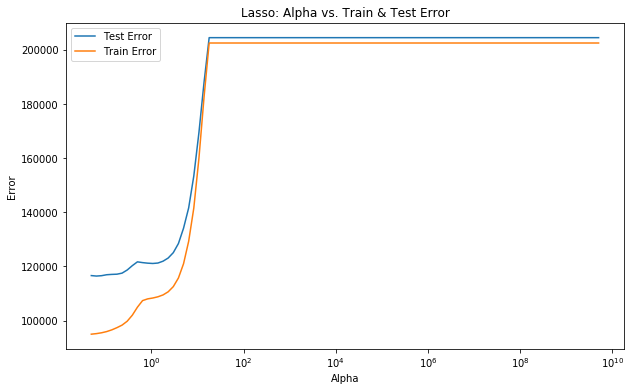

In [328]:
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, test_error, label = "Test Error")
ax.plot(alphas, train_error, label = "Train Error")

ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.axis('tight')
plt.legend()
plt.title('Lasso: Alpha vs. Train & Test Error')


In [329]:
#Run 10-fold cross-validation on the LASSO Regression model to find the optimal regularization penalty.
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 500000, normalize = True)
lasso_cv.fit(X, Y)
optimal_lasso_alpha = lasso_cv.alpha_
print("With 10-fold cross-validation for the LASSO regression, the optimal value of the regularization penalty is:", optimal_lasso_alpha)

With 10-fold cross-validation for the LASSO regression, the optimal value of the regularization penalty is: 0.0635481759985745


In [330]:
#Rerunning LASSO Regression using the optimal regularization penalty (alpha).
lasso_reg = Lasso(alpha = optimal_lasso_alpha, normalize = True)
lasso_reg.fit(X, Y)

print(Series(lasso_reg.coef_, index=X.columns).sort_values())


Years     -6.107625
Errors    -2.450795
AtBat     -2.082954
CWalks    -0.690601
Runs      -0.682615
CAtBat    -0.087066
HmRun      0.000000
CHits      0.000000
CHmRun     0.156468
PutOuts    0.292694
Assists    0.304372
RBI        0.496552
CRBI       0.583821
CRuns      1.228061
Walks      5.511781
Hits       7.041011
dtype: float64


Using the optimal value of alpha, we see that there are 14 predictors left in the LASSO Regression model. We can see that both HMRun and CHits have their coefficients shrunk to 0, which leaves us with 14 predictors. 



**QUESTION 1.2)**

Text(0.5,1,'Ridge: Coefficient Trajectories')

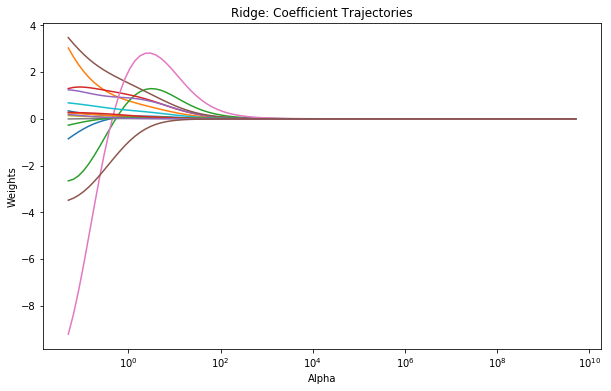

In [331]:
#Running the Ridge Regression for the first time. 
ridge_reg = Ridge(normalize = True)
ridge_coeff = []
for the_alpha in alphas:
    ridge_reg.set_params(alpha=the_alpha)
    ridge_reg.fit(X, Y)
    ridge_coeff.append(ridge_reg.coef_)
    
#ans_coeffs = ridge_reg.coef_
#print("coeffs:", ans_coeffs)

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, ridge_coeff)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.axis('tight')
plt.title('Ridge: Coefficient Trajectories')
    
    
#coef = Series(ridge_reg.coef_,X.columns).sort_values()
#coef.plot(kind='bar', title='Ridge: Modal Coefficients')

Years     -9.213506
Errors    -3.483692
HmRun     -2.654725
AtBat     -0.854383
CWalks    -0.271336
CAtBat    -0.006362
CHits      0.133943
Assists    0.187177
CRBI       0.255515
PutOuts    0.273998
CRuns      0.339680
CHmRun     0.682169
RBI        1.240590
Runs       1.295596
Hits       3.030221
Walks      3.472103
dtype: float64


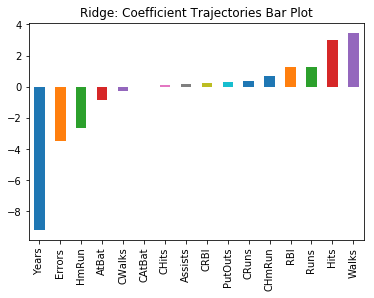

In [332]:
coef = Series(ridge_reg.coef_,X.columns).sort_values()
print(coef)
coef.plot(kind='bar', title='Ridge: Coefficient Trajectories Bar Plot')

From the visualization above, when we use Ridge regression the top three predictors are Walks, Hits, and Runs. Unlike LASSO, Ridge Regression cannot shrink any coefficients to zero.

In [333]:
#To answer the Bias-Variance Tradeoff problem, we will look at the training and testing error
#for the Ridge Regression under different values of alpha. The hyperparameter alpha denotes
#degree of shrinkage for the coefficients. A higher value of alpha indicates that the model 
#is less complex as more predictors will be shrunk towards zero (but not equal to). Such a model would be said
#to have high bias and low variance. A lower value of alpha indicates that the model is more
#complex as there would be more predictors that are nonzero, which would indicate low bias and 
#high variance due to the potential overfitting.


num_folds = 10
train_error = []
test_error = []
errors = []
kf = KFold(n_splits = num_folds)

for the_alpha in alphas:
    mse_train_error = 0
    mse_test_error = 0
    
    ridge_reg.set_params(alpha = the_alpha)    
    for train_index, test_index in kf.split(X):
        X_train =  X.iloc[train_index]
        X_test =  X.iloc[test_index]
        Y_train =  Y.iloc[train_index]
        Y_test =  Y.iloc[test_index]
        
        ridge_reg.fit(X_train, Y_train)
        mse_train_error += mean_squared_error(Y_train, ridge_reg.predict(X_train))
        mse_test_error += mean_squared_error(Y_test, ridge_reg.predict(X_test))
        
    #print("kf.get_n_splits(X,Y):", kf.get_n_splits(X,Y))
    mse_train_error = mse_train_error/num_folds
    mse_test_error = mse_test_error/num_folds
    
    train_error.append(mse_train_error)
    test_error.append(mse_test_error)
    errors.append([mse_train_error, mse_test_error])
    

Text(0.5,1,'Ridge: Alpha vs. Train & Test Error')

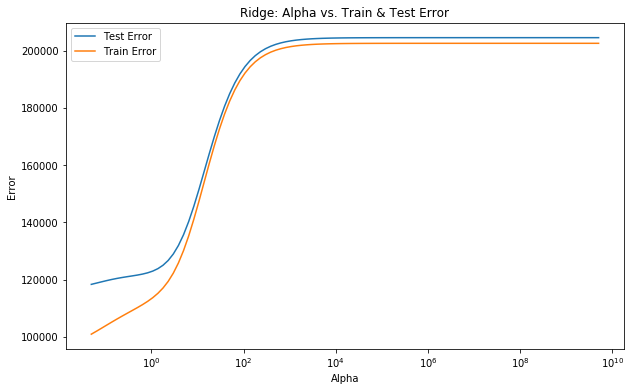

In [334]:
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, test_error, label = "Test Error")
ax.plot(alphas, train_error, label = "Train Error")

ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.axis('tight')
plt.legend()
plt.title('Ridge: Alpha vs. Train & Test Error')

In [335]:
#Running 10-fold cross-validation on the Ridge Regression Model to find the optimal regularization penalty.
ridge_cv = RidgeCV(alphas = alphas, normalize = True, scoring = "neg_mean_squared_error", cv = 10)
ridge_cv.fit(X, Y)
optimal_ridge_alpha = ridge_cv.alpha_
print("With 10-fold cross-validation for the Ridge Regression, the optimal value of the regularization penalty is:", optimal_ridge_alpha)


With 10-fold cross-validation for the Ridge Regression, the optimal value of the regularization penalty is: 0.05


Years     -9.213506
Errors    -3.483692
HmRun     -2.654725
AtBat     -0.854383
CWalks    -0.271336
CAtBat    -0.006362
CHits      0.133943
Assists    0.187177
CRBI       0.255515
PutOuts    0.273998
CRuns      0.339680
CHmRun     0.682169
RBI        1.240590
Runs       1.295596
Hits       3.030221
Walks      3.472103
dtype: float64


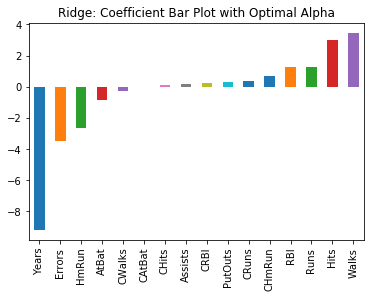

In [336]:
#Rerunning Ridge Regression using the optimal regularization penalty (alpha).
ridge_reg = Ridge(alpha = optimal_ridge_alpha, normalize = True)
ridge_reg.fit(X, Y)

coef = Series(ridge_reg.coef_,X.columns).sort_values()
print(coef)
coef.plot(kind='bar', title='Ridge: Coefficient Bar Plot with Optimal Alpha')

Since Ridge Regression does not shrink any of the coefficients of the predictors to 0, as we can see from the output dataframe and visualization above, the number of predictors stays the same. 